In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras as k

In [3]:
(trainx, trainy), (testx, testy) = k.datasets.fashion_mnist.load_data()

In [4]:
len(trainx)

60000

In [5]:
len(trainy)

60000

In [6]:
len(testx)

10000

In [7]:
len(testy)

10000

In [8]:
def preprocess(x, y):
    x = tf.cast(x, tf.float32)/255
    y = tf.cast(y, tf.int64)
    
    return x, y

1. ### from_tensor_slices returns an generator so we can view the content using for loop

<code>for i in tf.data.Dataset.from_tensor_slices((testx, testy)):
    print(i)
    break
</code>

2. ### How batch works
https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch

Batch size decides the total number of batches. For example we have 10000 images then <code>batch size=1</code> means we will get 1 batch with 10000 rows in it.

Again if we have 10000 images but now we have <code>batch size = 2</code> then in <code>batch 1</code> we have 5000 image and <code>batch 2</code> also have 5000 images

Again if we have 10000 images but now we have <code>batch size = 3</code> then we do <code>10000/batchsize i.e 10000/3</code> and for <code>batch 1</code> we have 10000/3 image and <code>batch 2</code> also have 10000/3 images <code>batch 3</code> also have 10000/3 images.

#### #Try this out


<code>x = list(tf.data.Dataset.from_tensor_slices((testx, testy)).map(preprocess).shuffle(len(testy)).batch(3).as_numpy_iterator())
len(x)
</code>  

<br>

3. ### Map

Map the function to all the images

<br>

4. ### Shuffle

We are shuffling so that model should not learn that data is sequential

5. ### Trick

agar kahin pe tumne list  - [] use kia hai aur error aa rha hai to bus list ke jagah tuple use kar do
    eg:
    ye errornous hai<br>
    <code>tf.data.Dataset.from_tensor_slices([x, y]).map(preprocess).shuffle(len(y)).batch(128)</code>
    <br><br>
    jabki ye error free hai<br>
    <code>tf.data.Dataset.from_tensor_slices((x, y)).map(preprocess).shuffle(len(y)).batch(128)</code>

In [68]:
def create_dataset(x, y, classes = 10):
    y = tf.one_hot(y, depth=classes)
    
    return tf.data.Dataset.from_tensor_slices((x, y)).map(preprocess).shuffle(len(y)).batch(128)

In [69]:
train_dataset = create_dataset(trainx, trainy)
test_dataset = create_dataset(testx,testy)

In [71]:
train_dataset

<BatchDataset shapes: ((None, 28, 28), (None, 10)), types: (tf.float32, tf.int64)>

In [72]:
test_dataset

<BatchDataset shapes: ((None, 28, 28), (None, 10)), types: (tf.float32, tf.int64)>

### All the none are batch size
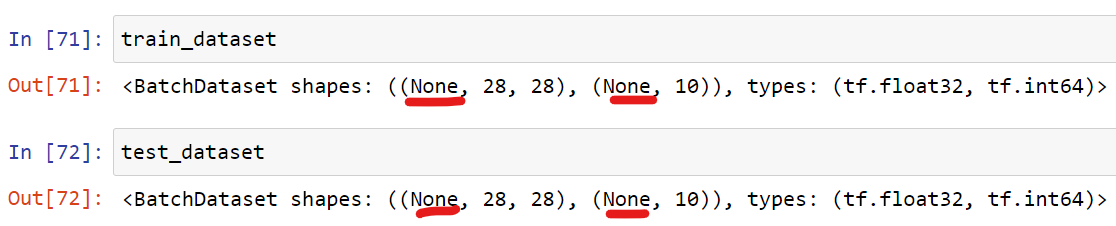

In [73]:
model = k.Sequential([
    k.layers.Reshape(target_shape=(28*28,), input_shape=(28,28)),
    k.layers.Dense(units=256, activation='relu'),
    k.layers.Dense(units=192, activation='relu'),
    k.layers.Dense(units=128, activation='relu'),
    k.layers.Dense(units=10, activation='softmax')
])

## What are logits

Logit is a function that maps probabilities [0, 1] to [-inf, +inf].

Softmax is a function that maps [-inf, +inf] to [0, 1] similar as Sigmoid. But Softmax also normalizes the sum of the values(output vector) to be 1.

In [74]:
model.compile(
    optimizer = 'adam',
    loss=tf.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [76]:
train_dataset.repeat()

<RepeatDataset shapes: ((None, 28, 28), (None, 10)), types: (tf.float32, tf.int64)>

## What is Repeat method
https://stackoverflow.com/a/53517848
## What is steps_per_epochs
https://datascience.stackexchange.com/a/47413 <br><br>
<code>steps_per_epoch * batch_size = number_of_rows_in_train_data</code>

In [78]:
callback = [k.callbacks.EarlyStopping(
    monitor='accuracy',
    patience = 10
)]

In [95]:
history = model.fit(
    x = train_dataset.repeat(),
    epochs = 10,
    steps_per_epoch = 500,
    validation_data = test_dataset.repeat(),
    validation_steps=2,
    callbacks=callback
)

Epoch 1/10
500/500 [==============================] - 3s 6ms/step - loss: 1.6441 - accuracy: 0.8167 - val_loss: 1.6871 - val_accuracy: 0.7734
Epoch 2/10
500/500 [==============================] - 3s 6ms/step - loss: 1.6467 - accuracy: 0.8139 - val_loss: 1.6507 - val_accuracy: 0.8125
Epoch 3/10
500/500 [==============================] - 3s 6ms/step - loss: 1.6420 - accuracy: 0.8186 - val_loss: 1.6635 - val_accuracy: 0.8008
Epoch 4/10
500/500 [==============================] - 3s 6ms/step - loss: 1.6413 - accuracy: 0.8195 - val_loss: 1.6114 - val_accuracy: 0.8477
Epoch 5/10
500/500 [==============================] - 3s 6ms/step - loss: 1.6426 - accuracy: 0.8183 - val_loss: 1.6540 - val_accuracy: 0.8047
Epoch 6/10
500/500 [==============================] - 3s 6ms/step - loss: 1.6412 - accuracy: 0.8193 - val_loss: 1.6438 - val_accuracy: 0.8164
Epoch 7/10
500/500 [==============================] - 3s 6ms/step - loss: 1.6439 - accuracy: 0.8168 - val_loss: 1.6410 - val_accuracy: 0.8164
Epoch 

In [98]:
import matplotlib.pyplot as plt
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [99]:
[loss, accuracy, val_loss, val_accuracy] = [
    history.history['loss'],
    history.history['accuracy'],
    history.history['val_loss'],
    history.history['val_accuracy'],
]

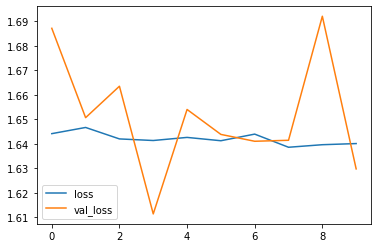

In [100]:
plt.plot(loss)
plt.plot(val_loss)

plt.legend(['loss', 'val_loss'])

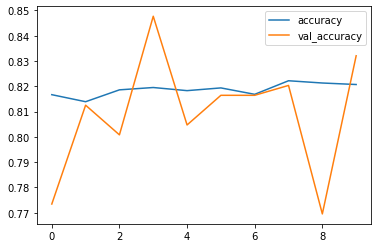

In [101]:
plt.plot(accuracy)
plt.plot(val_accuracy)

plt.legend(['accuracy', 'val_accuracy'])

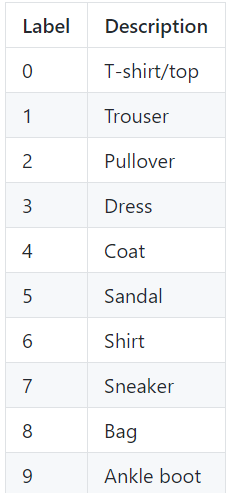

In [102]:
predictions = model.predict(test_dataset)

In [105]:
predictions[0]

array([6.5056583e-16, 1.0316596e-13, 6.5448595e-17, 1.8588428e-07,
       2.1604920e-15, 2.8845034e-11, 1.1567065e-14, 9.9999976e-01,
       7.5071017e-12, 4.8607820e-15], dtype=float32)

In [106]:
import numpy as np

In [108]:
np.argmax(predictions[0])

7

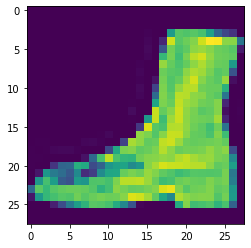

In [113]:
for i in test_dataset: # as test_datasets are generator
    plt.imshow(i[0][0])
    break